In [ ]:
## Assignemnt 3.2: (1.1 & 1.2; 2.1 & 2.4)
## http://thinkstats2.com\n",
## Copyright 2016 Allen B. Downey\n",
## MIT License: https://opensource.org/licenses/MIT\n"

In [6]:
## Load dataframe
from __future__ import print_function, division
import nsfg

## Question 1.1

In [7]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names

In [8]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [9]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [10]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [11]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [12]:
pregordr[0]

1

Select a slice from a column.

In [13]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [14]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [15]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [16]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame. Use it to select the pregnancy outcomes for a single respondent.

In [17]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

Select the birthord column, print the value counts, and compare to results published in the codebook

In [18]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use isnull to count the number of nans.

In [19]:
preg.birthord.isnull().sum()

4445

Select the prglngth column, print the value counts, and compare to results published in the codebook

In [20]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the mean method on a Series. For example, here is the mean birthweight in pounds:

In [21]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named totalwgt_kg that contains birth weight in kilograms. Compute its mean. Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [22]:
preg['totalwgt_kg'] = preg.totalwgt_lb * 0.453592
preg.totalwgt_kg.mean()

3.2956309433503437

nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:

In [23]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [24]:
resp = nsfg.ReadFemResp()

DataFrame provides a method head that displays the first five rows:

In [25]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

In [26]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

How old are the youngest and oldest respondents: The oldest respondent is 44, the youngest respondent is 15.

We can use the caseid to match up rows from resp and preg. For example, we can select the row from resp for caseid 2298 like this:

In [27]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from preg like this:

In [28]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with caseid 1?

In [29]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

How old is the respondent with caseid 1: Respondent with caseid 1 is 44

What are the pregnancy lengths for the respondent with caseid 2298?

In [30]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What are the pregnancy lengths for the respondent with caseid 2298: The pregnancies were 40, 36, 30, and 40 weeks long

What was the birthweight of the first baby born to the respondent with caseid 5012?

In [31]:
preg[preg.caseid==5012].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64

What was the birthweight of the first baby born to the respondent with caseid 5012:  6 lbs

## Question 1.2

Create a code that reads the respondent file, 2002FemResp.dat.gz.
Make a dictionary that maps from each caseid to a list of indices into the DataFrame.

In [45]:
import thinkstats2
import nsfg
dct = thinkstats2.ReadStataDct('2002FemResp.dct')
resp_df = dct.ReadFixedWidth('2002FemResp.dat.gz', compression='gzip', nrows=None)

Print value counts of variable pregnum then print results from NSFG codebook and compare.

In [108]:
print(resp_df.pregnum.value_counts())
print(f'1 pregnancy: {resp_df[resp_df.pregnum == 1].pregnum.count()}')
print(f'2 pregnancies: {resp_df[resp_df.pregnum == 2].pregnum.count()}')
print(f'3 pregnancies: {resp_df[resp_df.pregnum == 3].pregnum.count()}')
print(f'4 pregnancies: {resp_df[resp_df.pregnum == 4].pregnum.count()}')
print(f'5 pregnancies: {resp_df[resp_df.pregnum == 5].pregnum.count()}')
print(f'7+ pregnancies: {resp_df[resp_df.pregnum >= 7].pregnum.count()}')

preg_map = nsfg.MakePregMap(nsfg.ReadFemPreg())

match_flag = True

for index, pregnum in resp_df.pregnum.items():
    caseid = resp_df.caseid[index]
    indices = preg_map[caseid]
    if len(indices) != pregnum:
        print(caseid, len(indices),pregnum)
        match_flag = False
        break
if match_flag:
        print('Records Match')
else:
        print ('Records Do Not Matched')

0     2610
2     1432
1     1267
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64
1 pregnancy: 1267
2 pregnancies: 1432
3 pregnancies: 1110
4 pregnancies: 611
5 pregnancies: 305
7+ pregnancies: 158
Records Match


Based on output we find that the pregnancy counts are consistent.

## Question 2.1
Based on the results in this chapter, suppose you were asked to summarize whether first babies arrive late.

Which summary statistic would you use if wanted to get a story on the evening news? 

In order to get a story on the evening news you need some shock factor and something that will grab the attention of potential viewers. 
The statistic that would likely do this is the percent of first pregnancies that are longer than the mean for other pregnancies. 
Based on the results in this capter we know that the mean pregnancy length for first births is slightly higher than pregnancy length for other births. With this information we can conclude that a high percent of first births will be longer than the average length of other births. 
By using a headline such as 'Over 50% of first births are longer than subsequent births!' we can grab people's attention while not being inaccurate.
This headline leaves out the information about how long the difference is and focuses on what people want to know 'Is it likely my first pregnancy was longer than my others will be?'


Which would you use if you wanted to reassure an anxious parent?

Using the mean pregnancy length would be reassuring to anxious parents. 
Knowing that the mean first pregnancy is only 38.6 weeks would reassure parents that most first pregnancies do not extend beyond 41 weeks gestation. 


Finally, imagine you are Cecil Adams, author of The Straight Dope, and your job is to answer the question, 'Do first babies arrive late?' Write a paragraph that uses the resuts in this chapter to answer the question clearly,  percisely, and honestly. 

The difference between the lengths of first births and subsequent births is quite small. Overall, a small percent of all pregnancies go past 41 weeks gentation to be considered truely late.  In fact, the average pregnancy length for first births is only 38.601 weeks! That means you have a 50% chance of having your baby before 38.6 weeks. Furthermore, with a standard deviation of 2.7 weeks, you have a  85.1% chance of having. your baby before you reach 41.3 weeks! If you are worried about the difference between your first birth and other birth lengths, rest assured, the difference in mean pregnancy lengths is only 13 hours! Do not fear that a first pregnancy will last significantly longer than any other pregnancies.  


## Question 2.4
Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 
Compute Cohen's d to quantify the difference between the groups. 
How does it compare to the difference in pregnancy length?

The mean of first births is 7.201094430437772
The variation in first births if 2.0180273009157768
The standard deviation of first births is 1.4205728777207374


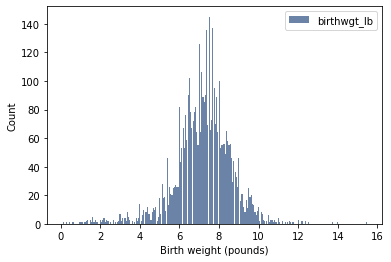

In [119]:
import sys
import numpy as np
import thinkstats2
import thinkplot
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

## Focus on first births

first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='birthwgt_lb')
thinkplot.Hist(first_hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

first_mean = firsts.totalwgt_lb.mean()
print('The mean of first births is {}.'.format(first_mean))

first_var = firsts.totalwgt_lb.var()
print('The variation in first births if {}'.format(first_var))

first_std = firsts.totalwgt_lb.std()
print('The standard deviation of first births is {}'.format(first_std))

The mean of other births is 7.325855614973262.
The variation of other births is 1.9437810258964572.
The standard deviation of other births is 1.3941954762143138.


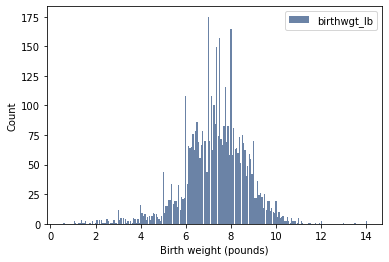

In [122]:
## Focus on other births

other_hist = thinkstats2.Hist(others.totalwgt_lb, label='birthwgt_lb')
thinkplot.Hist(other_hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

other_mean = others.totalwgt_lb.mean()
print('The mean of other births is {}.'.format(other_mean))

other_var = others.totalwgt_lb.var()
print('The variation of other births is {}.'.format(other_var))

other_std = others.totalwgt_lb.std()
print('The standard deviation of other births is {}.'.format(other_std))

In [123]:
## The mean weight for first births is lower than the mean weight for subsequent births.
## Calculate Cohen's D
diff = first_mean - other_mean

var1 = first_var
var2 = other_var
n1, n2 = len(firsts.totalwgt_lb), len(others.totalwgt_lb)

pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / np.sqrt(pooled_var)
print('Cohen\'s d is {}.'.format(d))

Cohen's d is -0.088672927072602.


While the mean of first borns' birthweight is lower than subsequent births', the difference is very small.
We know the difference is very small because the value of Cohen's D is -.0887 
This indicates that the difference between the means is only .08 standard deviations different.
Knowing the standard deviation is approximately 1.4 lbs we can conclude the difference in means is about .11 lbs or less than 2 ounces